In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import mlflow

In [10]:
mobile = pd.read_csv('mobile.csv')
mobile.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


<AxesSubplot: ylabel='count'>

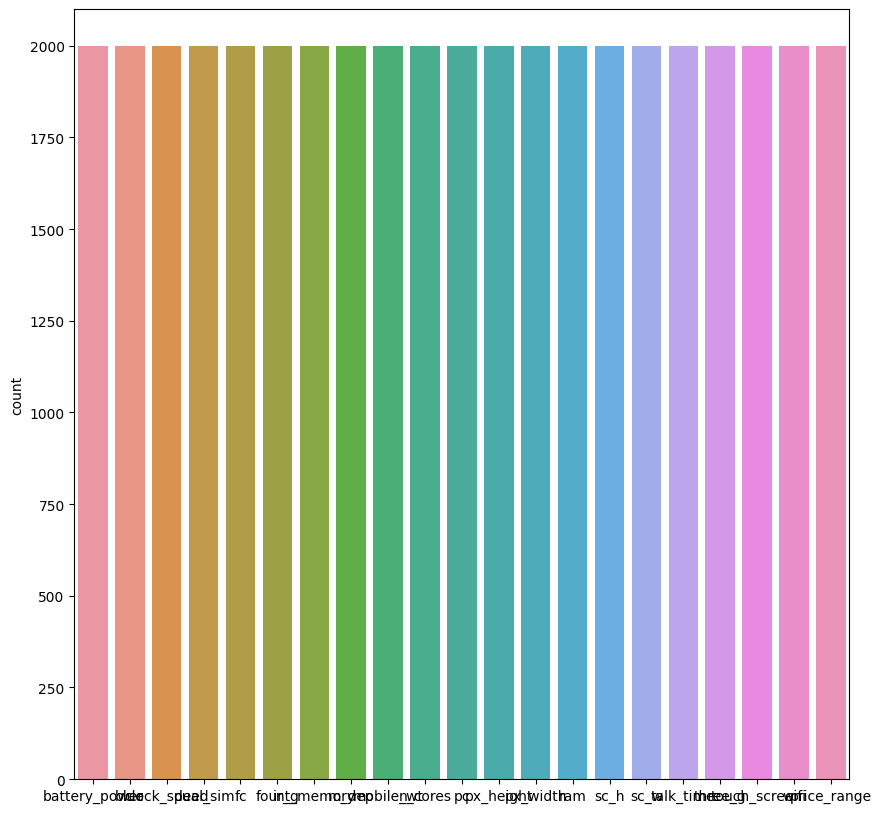

In [86]:
plt.figure(figsize=(10,10))
sns.countplot(mobile)

In [12]:
dst_mob=mobile.select_dtypes(exclude='object')
dst_mob

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [13]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

(array([500.,   0.,   0., 500.,   0.,   0., 500.,   0.,   0., 500.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

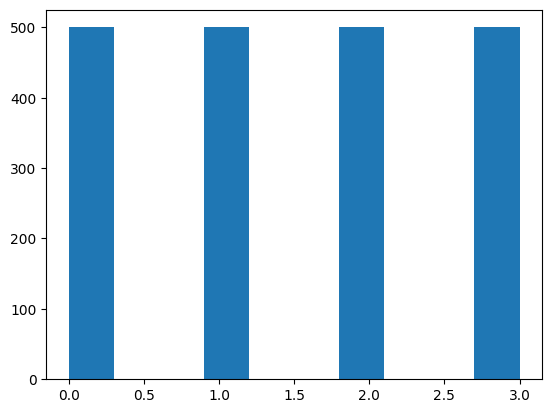

In [14]:
plt.hist(mobile.price_range)

C:\Users\cathrine\AppData\Local\Temp\ipykernel_12940\1637255777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mobile.price_range)


<AxesSubplot: xlabel='price_range', ylabel='Density'>

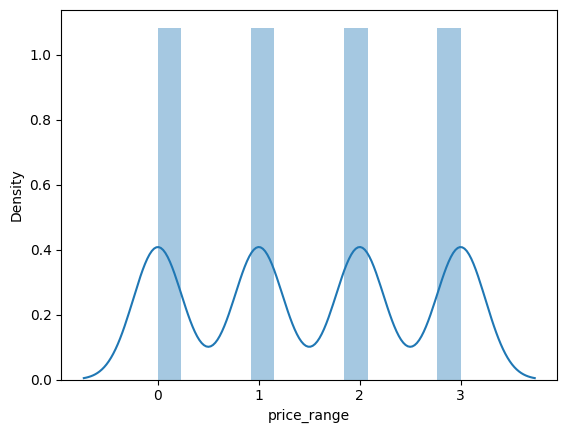

In [15]:
sns.distplot(mobile.price_range)

In [16]:
mobile.shape

(2000, 21)

In [17]:
mobile.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [18]:
mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [19]:
X = mobile.iloc[:,:-1]
y = mobile.iloc[:,-1]

In [20]:
X.shape

(2000, 20)

In [21]:
y.head(3)

0    1
1    2
2    2
Name: price_range, dtype: int64

# Feature selection based on Kbest using chi2

In [22]:
best_features_score = SelectKBest(score_func=chi2, k=10)
best_features_score.fit(X,y)
best_features = pd.DataFrame(best_features_score.scores_, columns = ['score'])
best_features
Xcols = pd.DataFrame(X.columns, columns = ['Feature_name'])
best_scores = pd.concat([Xcols, best_features], axis=1)
best_scores

,Feature_name,score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


#Top 10 best feature score

In [23]:
best_scores.nlargest(10,'score')

,Feature_name,score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [25]:
#train and TEst ata splits
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=124)

In [98]:
#Scaling the Feature
scaler = StandardScaler()
mob_scaled=scaler.fit_transform(X)
mob_scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mob_scaled,y, test_size=0.3, random_state=124)

In [99]:
#Model Selection
model_lr_mob = LogisticRegression()
model_lr_mob_scaled = LogisticRegression()
model_dt_mob = DecisionTreeClassifier()
model_rf_mob = RandomForestClassifier()

In [29]:
pipe_lr = Pipeline([('Standard Scaler', StandardScaler(), LogisticRegression())])

#ML FLOW INTEGRATION


In [30]:
#Setting up experiment using MLFOW
mlflow.set_experiment("Classification Experiment")
mlflow.sklearn.autolog()

In [31]:
# Experiment with logistic regression Algorithm with standard scaler scaled value
with mlflow.start_run(run_name="Scaled Logistic regression") as run:
    model_lr_mob_scaled.fit(X_train,y_train)
    predslr = model_lr_mob_scaled.predict(X_test)

2023/01/02 07:15:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\mob\mob\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."


In [94]:
print("Logistic Regression with scaled value Model Training and Test Score Below :")
print("Model Score on Training data :",model_lr_mob_scaled.score(X_train, y_train))
print("Model Score on Test Data: ", model_lr_mob_scaled.score(X_test, y_test))

Logistic Regression with scaled value Model Training and Test Score Below :
Model Score on Training data : 0.9807142857142858
Model Score on Test Data:  0.9516666666666667


In [32]:
# Experiment with logistic regression Algorithm with out scaling
with mlflow.start_run(run_name="Logistic regression") as run:
    model_lr_mob.fit(X_train,y_train)
    predslr = model_lr_mob.predict(X_test)

In [93]:
print("Logistic Regression model Training and Test Score Below :")
print("Model Score on Training data :",model_lr_mob.score(X_train, y_train))
print("Model Score on Test Data: ", model_lr_mob.score(X_test, y_test))

Logistic Regression model Training and Test Score Below :
Model Score on Training data : 0.9807142857142858
Model Score on Test Data:  0.9516666666666667


In [33]:
# Experiment with Decisioin Tree Classifier Algorithm with out scaling
with mlflow.start_run(run_name="Decisioin Tree Classifier") as run:
    model_dt_mob.fit(X_train,y_train)
    preds_dt = model_dt_mob.predict(X_test)

In [95]:
print("Decision Treee Classifier Training and Test Score Below :")
print("Model Score on Training data :",model_dt_mob.score(X_train, y_train))
print("Model Score on Test Data: ", model_dt_mob.score(X_test, y_test))

Decision Treee Classifier Training and Test Score Below :
Model Score on Training data : 1.0
Model Score on Test Data:  0.815


In [34]:
# Experiment with Random Forest classifier Algorithm with out scaling
with mlflow.start_run(run_name="Random Forest classifier") as run:
    model_rf_mob.fit(X_train,y_train)
    preds_rf = model_rf_mob.predict(X_test)

In [96]:
print("Random Forest Classifier Training and Test Score Below :")
print("Model Score on Training data :",model_rf_mob.score(X_train, y_train))
print("Model Score on Test Data: ", model_rf_mob.score(X_test, y_test))

Random Forest Classifier Training and Test Score Below :
Model Score on Training data : 1.0
Model Score on Test Data:  0.865
